In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Relação da concentração de surfactante com a tensão iterfacial (Szyszkowski equation):

$$ \gamma = \gamma_0 - \Gamma_s k_B T ln(1 + \frac{n}{n_s}) $$

In [2]:
LAS = pd.read_table('LAS.txt', sep = ',')
x, y = LAS['C'], LAS['G']
print(x)

0     0.002879
1     0.008582
2     0.028913
3     0.043219
4     0.086195
5     0.171907
6     0.287874
7     0.430305
8     0.865728
9     1.726600
10    2.866193
Name: C, dtype: float64


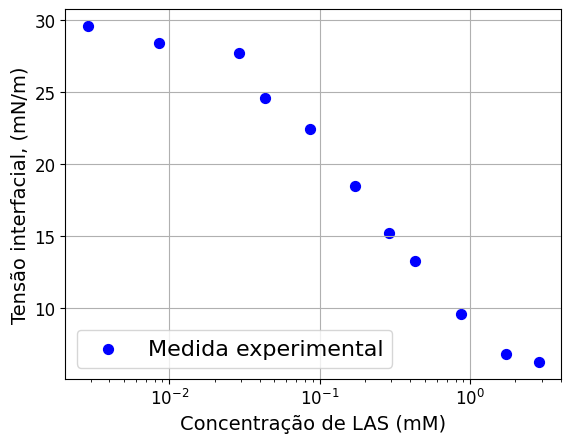

In [3]:
fig, ax = plt.subplots(1,1)

ax.scatter(x, y, s = 50, c = 'blue', label = "Medida experimental")
#ax.plot(x,y, linewidth = 1.7, c = 'blue')
ax.set_xscale('log')
ax.set_xlabel('Concentração de LAS (mM)', fontsize = 14)
ax.set_ylabel('Tensão interfacial, (mN/m)', fontsize = 14)
ax.tick_params(axis='both', labelsize=12)
ax.grid('--')
ax.legend(fontsize=16)
plt.show()

In [4]:
# parâmetros
alfa = 0.43*10**(-18) # m^2
gamma_0 = 30.5 # mN/m
GAMMA_S = 1/(alfa)
kb = 1.380649e-23
T = 298 # K
ns = 0.5 #mM 
n_cmc = 1.42

In [5]:
# Equação:
def gamma(n):
    gamma = gamma_0 - 1000*GAMMA_S*kb*T*np.log(1+ n/ns)
    return gamma

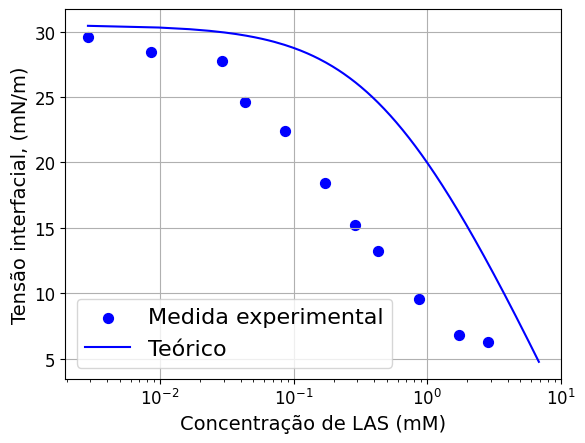

In [6]:
xt = np.linspace(0.002879, list(x)[-1]+4, 1000)
yt = gamma(xt)
fig, ax = plt.subplots(1,1)

ax.scatter(x, y, s = 50, c = 'blue', label = "Medida experimental")
ax.plot(xt, yt, c = 'blue', label = "Teórico")
#ax.plot(x,y, linewidth = 1.7, c = 'blue')
ax.set_xscale('log')
ax.set_xlabel('Concentração de LAS (mM)', fontsize = 14)
ax.set_ylabel('Tensão interfacial, (mN/m)', fontsize = 14)
ax.tick_params(axis='both', labelsize=12)
ax.grid('--')
ax.legend(fontsize=16)
#ax.axhline(0)
plt.savefig('comparacao.png', dpi = 200)